In [1]:
import pandas as pd 
import numpy as np 

In [2]:
df=pd.read_csv('titanic.csv',usecols=['Survived','Fare','Age'])

In [3]:
df

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
...,...,...,...
886,0,27.0,13.0000
887,1,19.0,30.0000
888,0,NaN,23.4500
889,1,26.0,30.0000


In [4]:
df.isnull().mean()*100 

Survived     0.00000
Age         19.86532
Fare         0.00000
dtype: float64

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
x_train,x_test,y_train,y_test = train_test_split(df[['Age','Fare']],df.Survived)

In [7]:
x_train['Age_imputed']=x_train['Age']
x_test['Age_imputed']=x_test['Age']

yahan pe humne xtrain se saari na values ko drop krdia fir remaining values se kuch number of samples uthaye jo ki total number of null hain .values lagaya numpy array bnanae ke liye 
fir usko xtrain ke us jaagh pe store kr dia jahan pe null values hain

In [8]:
x_train['Age_imputed'][x_train['Age_imputed'].isnull()]=x_train['Age'].dropna().sample(x_train['Age'].isnull().sum()).values

In [9]:
x_test['Age_imputed'][x_test['Age_imputed'].isnull()] = x_train['Age'].dropna().sample(x_test['Age'].isnull().sum()).values

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\Utsav\AppData\Local\Temp\ipykernel_9752\3925229177.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train['Age'],label='Original',hist=False)
C:\Users\Utsav\AppData\Local\Temp\ipykernel_9752\3925229177.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train['A

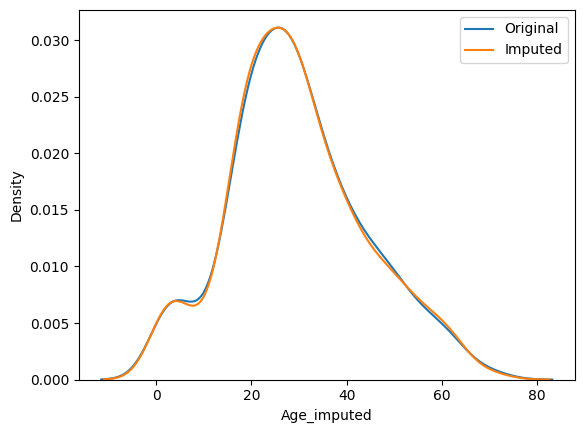

In [18]:
sns.distplot(x_train['Age'],label='Original',hist=False)
sns.distplot(x_train['Age_imputed'],label = 'Imputed',hist=False)

plt.legend()
plt.show()

In [19]:
print('Original variable variance: ', x_train['Age'].var())
print('Variance after random imputation: ', x_train['Age_imputed'].var())

Original variable variance:  203.5448993752293
Variance after random imputation:  203.4136037820162


In [21]:
x_train[['Fare', 'Age', 'Age_imputed']].cov()

,Fare,Age,Age_imputed
Fare,2204.137777,75.287957,57.583567
Age,75.287957,203.544899,203.544899
Age_imputed,57.583567,203.544899,203.413604
